# 시계열 분석(살짝 보자)

In [1]:
import pandas as pd

In [54]:
dust = pd.read_csv('C:/Users/cdetg/AppData/Roaming/SPB_Data/mise.csv', engine='python', encoding='cp949')

In [41]:
dust

,날짜,미세먼지농도 (㎍/㎥),결과
0,2017-01-10,19,좋음
1,2017-01-11,20,좋음
2,2017-01-13,29,좋음
3,2017-01-14,40,보통
4,2017-01-20,20,좋음
5,2017-01-21,20,좋음
6,2017-01-27,25,좋음
7,2017-01-28,40,보통
8,2017-01-31,40,보통
9,2017-02-01,50,보통


In [8]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
날짜               250 non-null object
 미세먼지농도 (㎍/㎥)    250 non-null int64
결과               250 non-null object
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


In [42]:
dust['날짜'] = pd.to_datetime(dust['날짜'])

In [43]:
dust.set_index('날짜', inplace=True)

In [44]:
# DatetimeInndex 로 바뀌었다.
dust.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2017-01-10 to 2017-12-31
Data columns (total 2 columns):
 미세먼지농도 (㎍/㎥)    250 non-null int64
결과               250 non-null object
dtypes: int64(1), object(1)
memory usage: 5.9+ KB


In [51]:
dust['2017-03']

,미세먼지농도 (㎍/㎥),결과
날짜,,
2017-03-01,38,보통
2017-03-02,39,보통
2017-03-03,29,좋음
2017-03-06,30,좋음
2017-03-07,40,보통
2017-03-08,41,보통
2017-03-09,20,좋음
2017-03-12,21,좋음
2017-03-13,22,좋음


In [31]:
# resample 은 어디에서 튀어나온거야? datetimeindex 쓰라네.
dust.index.resample('3D')

AttributeError: 'DatetimeIndex' object has no attribute 'resample'

In [25]:
# date_range : 날짜을 자동으로 만들어줌
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

## resample 하려면 index 가 datetimeindex 여야 한다.

In [29]:
series.resample('3T').sum()

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [36]:
dust

,날짜,미세먼지농도 (㎍/㎥),결과
0,2017-01-10,19,좋음
1,2017-01-11,20,좋음
2,2017-01-13,29,좋음
3,2017-01-14,40,보통
4,2017-01-20,20,좋음
5,2017-01-21,20,좋음
6,2017-01-27,25,좋음
7,2017-01-28,40,보통
8,2017-01-31,40,보통
9,2017-02-01,50,보통


----------------------

In [55]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
날짜               250 non-null object
 미세먼지농도 (㎍/㎥)    250 non-null int64
결과               250 non-null object
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


-----------------------------------

# fbProphet

In [24]:
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

In [25]:
import pandas as pd
from fbprophet import Prophet

In [26]:
data = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')

In [27]:
data

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
5,2007-12-15,7.783641
6,2007-12-16,8.414052
7,2007-12-17,8.829226
8,2007-12-18,8.382518
9,2007-12-19,8.069655


In [28]:
m = Prophet() # 인스턴스

In [11]:
vars(m) # 학습 시키기 전 vars()

{'growth': 'linear',
 'changepoints': None,
 'n_changepoints': 25,
 'specified_changepoints': False,
 'changepoint_range': 0.8,
 'yearly_seasonality': 'auto',
 'weekly_seasonality': 'auto',
 'daily_seasonality': 'auto',
 'holidays': None,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'changepoint_prior_scale': 0.05,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'interval_width': 0.8,
 'uncertainty_samples': 1000,
 'start': None,
 'y_scale': None,
 'logistic_floor': False,
 't_scale': None,
 'changepoints_t': None,
 'seasonalities': OrderedDict(),
 'extra_regressors': OrderedDict(),
 'country_holidays': None,
 'stan_fit': None,
 'params': {},
 'history': None,
 'history_dates': None,
 'train_component_cols': None,
 'component_modes': None,
 'train_holiday_names': None}

In [29]:
m.fit(data) # 학습시키다

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\cdetg\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
vars(m) # 학습 시킨 후 vars()

{'growth': 'linear', 'changepoints': 93     2008-03-17
 186    2008-06-20
 279    2008-10-11
 372    2009-01-14
 465    2009-04-17
 558    2009-07-19
 650    2009-10-26
 743    2010-01-31
 836    2010-05-06
 929    2010-08-14
 1022   2010-11-15
 1115   2011-02-16
 1208   2011-05-20
 1301   2011-08-21
 1394   2011-11-24
 1487   2012-02-27
 1580   2012-05-31
 1673   2012-09-01
 1765   2012-12-02
 1858   2013-03-05
 1951   2013-06-06
 2044   2013-09-08
 2137   2013-12-10
 2230   2014-03-14
 2323   2014-06-15
 Name: ds, dtype: datetime64[ns], 'n_changepoints': 25, 'specified_changepoints': False, 'changepoint_range': 0.8, 'yearly_seasonality': 'auto', 'weekly_seasonality': 'auto', 'daily_seasonality': 'auto', 'holidays': None, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 10.0, 'mcmc_samples': 0, 'interval_width': 0.8, 'uncertainty_samples': 1000, 'start': Timestamp('2007-12-10 00:00:00'), 'y_scale': 12.84674688882

In [30]:
future = m.make_future_dataframe(365)

In [31]:
m.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.039456,8.224892,9.459773,8.039456,8.039456,0.803072,0.803072,0.803072,0.352285,0.352285,0.352285,0.450788,0.450788,0.450788,0.0,0.0,0.0,8.842529
1,2007-12-11,8.037913,7.996623,9.231498,8.037913,8.037913,0.553160,0.553160,0.553160,0.119636,0.119636,0.119636,0.433525,0.433525,0.433525,0.0,0.0,0.0,8.591074
2,2007-12-12,8.036371,7.757931,8.961119,8.036371,8.036371,0.350539,0.350539,0.350539,-0.066659,-0.066659,-0.066659,0.417197,0.417197,0.417197,0.0,0.0,0.0,8.386909
3,2007-12-13,8.034828,7.739085,8.978422,8.034828,8.034828,0.329980,0.329980,0.329980,-0.072270,-0.072270,-0.072270,0.402250,0.402250,0.402250,0.0,0.0,0.0,8.364808
4,2007-12-14,8.033285,7.731311,8.970386,8.033285,8.033285,0.319516,0.319516,0.319516,-0.069572,-0.069572,-0.069572,0.389088,0.389088,0.389088,0.0,0.0,0.0,8.352801
5,2007-12-15,8.031742,7.476881,8.736191,8.031742,8.031742,0.066362,0.066362,0.066362,-0.311711,-0.311711,-0.311711,0.378072,0.378072,0.378072,0.0,0.0,0.0,8.098104
6,2007-12-16,8.030199,7.825752,9.068632,8.030199,8.030199,0.417798,0.417798,0.417798,0.048291,0.048291,0.048291,0.369507,0.369507,0.369507,0.0,0.0,0.0,8.447997
7,2007-12-17,8.028656,8.121337,9.342252,8.028656,8.028656,0.715923,0.715923,0.715923,0.352285,0.352285,0.352285,0.363638,0.363638,0.363638,0.0,0.0,0.0,8.744579
8,2007-12-18,8.027114,7.949545,9.136612,8.027114,8.027114,0.480283,0.480283,0.480283,0.119636,0.119636,0.119636,0.360647,0.360647,0.360647,0.0,0.0,0.0,8.507396
9,2007-12-19,8.025571,7.696484,8.989367,8.025571,8.025571,0.293993,0.293993,0.293993,-0.066659,-0.066659,-0.066659,0.360652,0.360652,0.360652,0.0,0.0,0.0,8.319564


In [32]:
# 필요한 정보 보기 (fancy indexing)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2007-12-10,8.842529,8.250285,9.440412
1,2007-12-11,8.591074,7.945468,9.224915
2,2007-12-12,8.386909,7.748891,9.009447
3,2007-12-13,8.364808,7.736645,8.983239
4,2007-12-14,8.352801,7.744903,8.998779
5,2007-12-15,8.098104,7.476062,8.760647
6,2007-12-16,8.447997,7.806502,9.063219
7,2007-12-17,8.744579,8.109817,9.328456
8,2007-12-18,8.507396,7.928946,9.128591
9,2007-12-19,8.319564,7.758053,8.932221


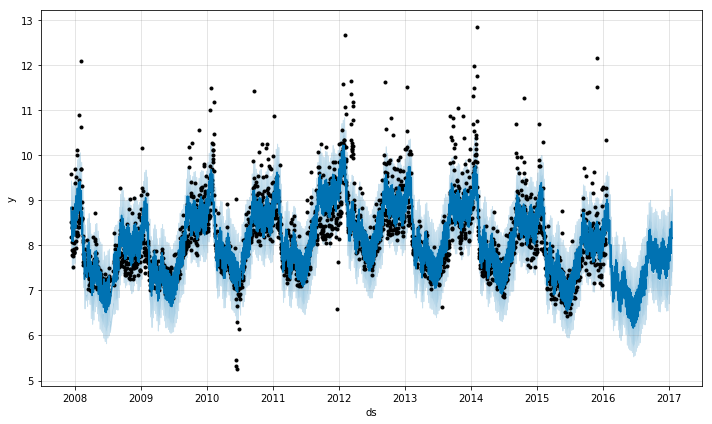

In [33]:
fig1 = m.plot(forecast)

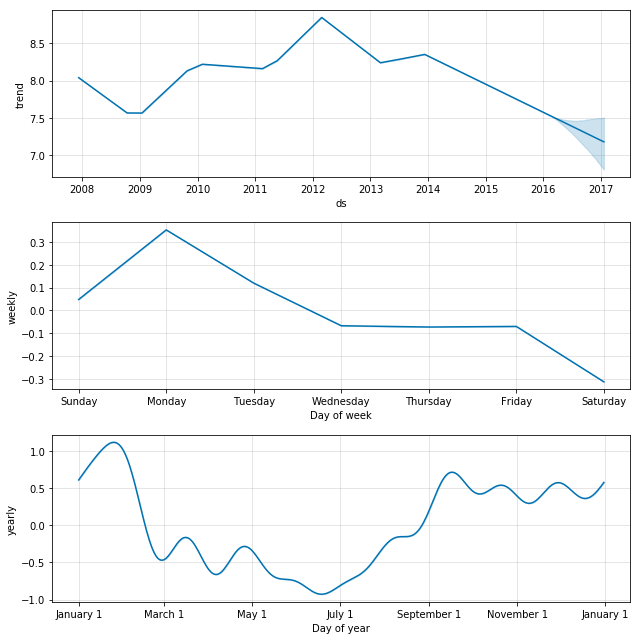

In [34]:
# 각각 구성요소 그리기
fig2 = m.plot_components(forecast)

    [단계]
    클래스 import
    인스턴스
    fit
    predict()
    결과는 plot 두 번째 결과 component